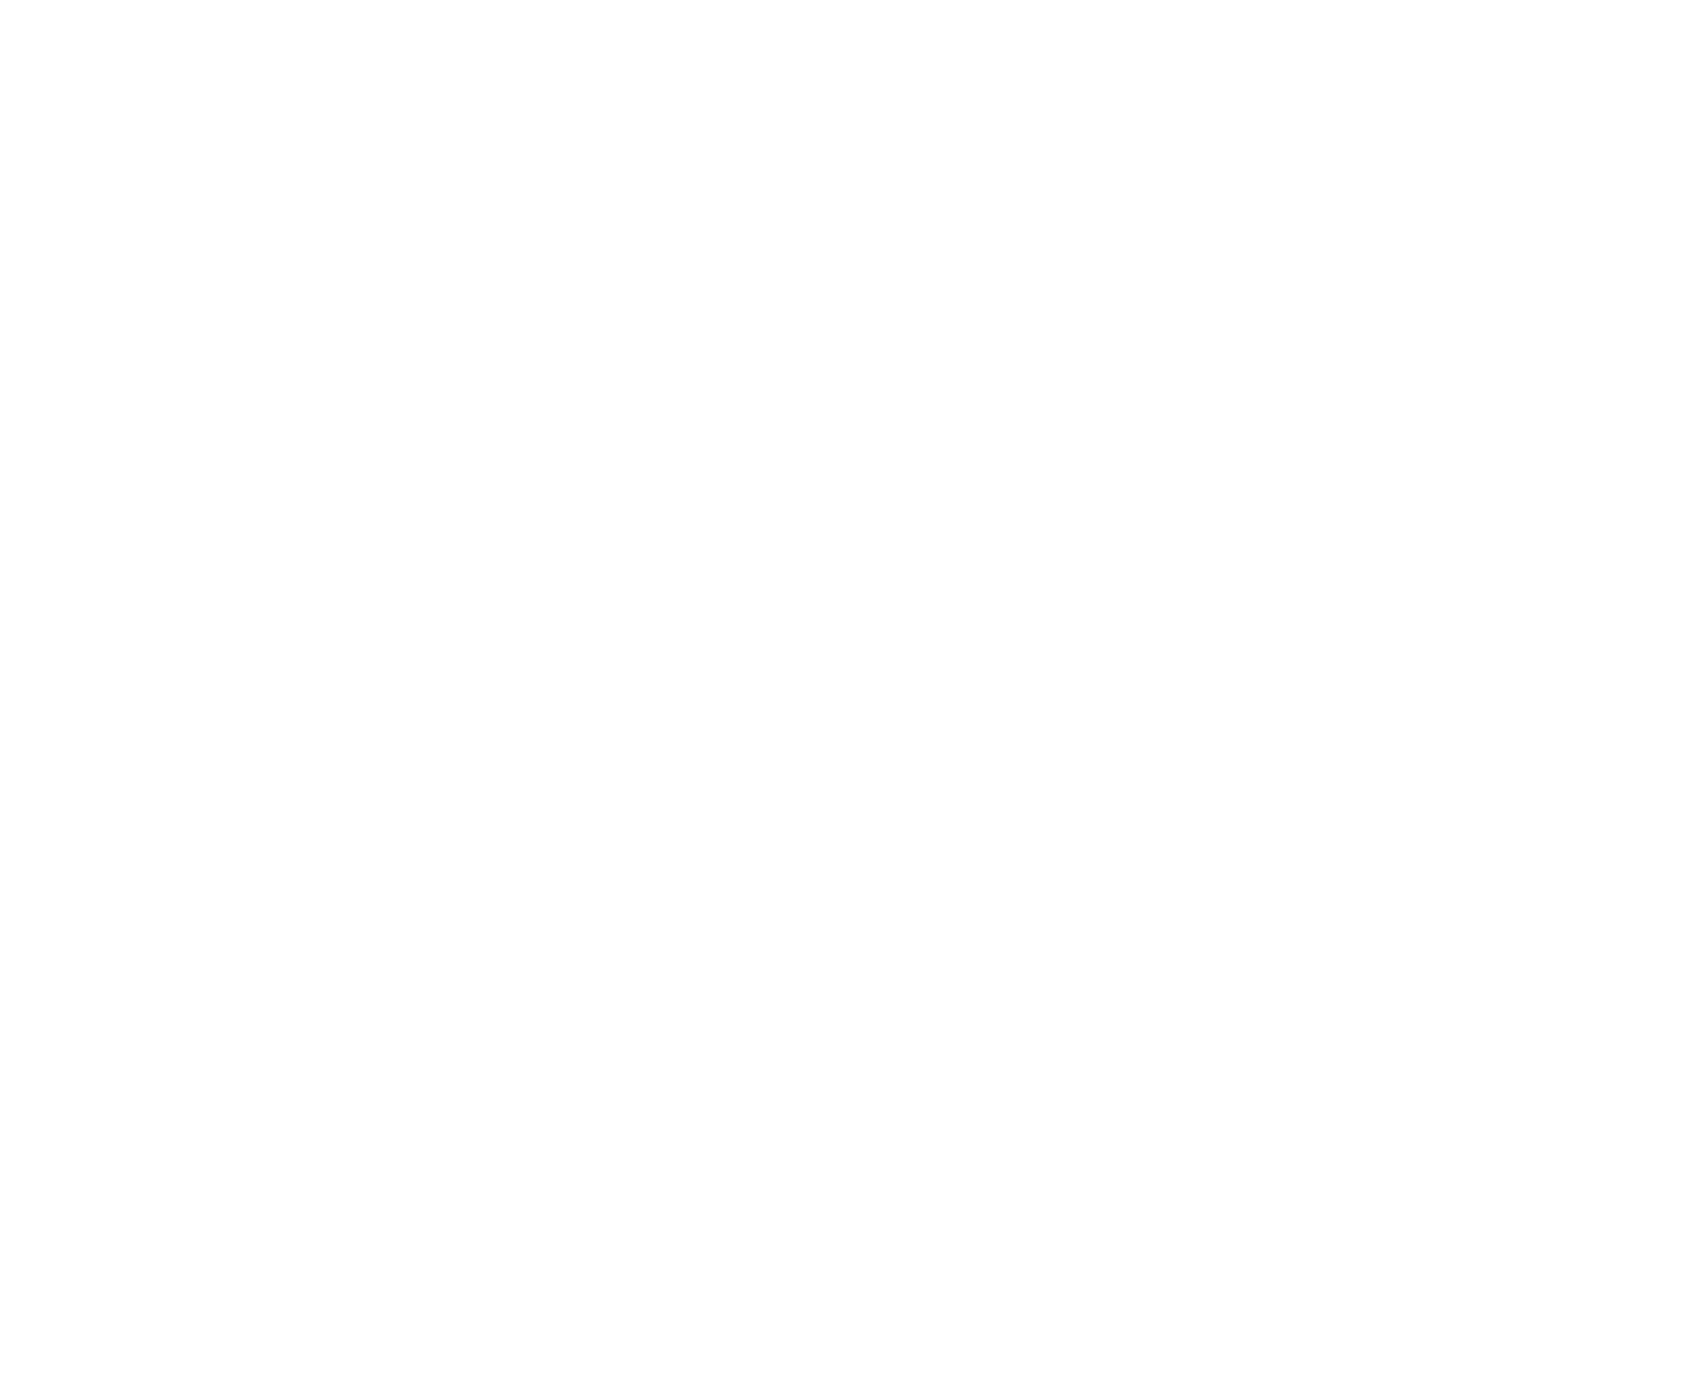

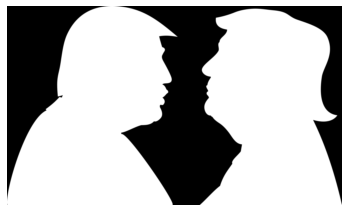

In [1]:
%matplotlib inline
import numpy as np
import math
import csv
import re
import nltk
from PIL import Image
import os
from os import path
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
    nltk.download("words")

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def split(word): 
    return list(word) 

def process_document(text):
    # Convert words to lower case
    #print(text)
    text = text.lower()
    
    text = text.split()
    newtext = [x for x in text if not x.startswith('@') and not x.startswith('https')] ##remove @ and link
    stop_words = stopwords.words('english')
    newtext = [x for x in newtext if x not in stop_words] ## remove stopwords
    
    newtext = ' '.join(newtext)
    
    tokenizer = RegexpTokenizer(r'\w+')
    newtext = tokenizer.tokenize(newtext)
    
    newtext = [WordNetLemmatizer().lemmatize(x,'v') for x in newtext]
    label = 0
    for ele in newtext:
        if ele =='amp':
            label = 1

    newtext = ' '.join(newtext)
    if label == 1:
        newtext = newtext.replace('amp','and')
   
    
    newtext = newtext.split()
    newtext = [x for x in newtext if x != 'donald']
    newtext = [x for x in newtext if x != 'trump']
    newtext = [x for x in newtext if x != 'presid']
    newtext = [x for x in newtext if x != 'via']
    newtext = [x for x in newtext if x != 're']
    newtext = [x for x in newtext if x != 'de']
    newtext = [x for x in newtext if len(x) != 1]
    return newtext



with open('trump.csv',encoding="utf8") as words_file:
        
    csv_reader = csv.DictReader(words_file, delimiter = ',')
    data = []
        
    for row in csv_reader:
        data.append(row['Text'])
            #emoji.append(row['Emoji'])
    data = np.array(data)
words =[]

for i, tweet in enumerate(data):
    a = process_document(tweet)
    words += a
counts = {}
for i in words:
    counts[i] = counts.get(i, 0) + 1
sorted_dict = sorted(counts.items(), key=lambda x: x[1])
top_words = np.array(sorted_dict[-40:][::-1])[:,0]
    
    
top_words = ' '.join(top_words)
    #print(emoji)
    
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    
trump_mask = np.array(Image.open(path.join(d, "dt.png")))
wc = WordCloud(background_color="black", max_words=2000, mask=trump_mask, contour_width=3, contour_color='steelblue').generate(top_words)
wc.to_file(path.join(d, "Trump.jpeg"))

    
    
plt.figure(figsize=(30,25))
plt.axis("off")
plt.figure()
plt.imshow(trump_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

   
#Hint from: https://blog.emojipedia.org/emoji-sentiment-analysis-2015-2017/
    


In [2]:
with open('../model/trump_output.csv',encoding="utf8") as words_file:
        
    csv_reader = csv.DictReader(words_file, delimiter = ',')
    data = []
    sentiment = []
    for row in csv_reader:
        data.append(row['Text'])
        ss = int(row['Sentiment'][10])
        sentiment.append(ss)
    data = np.array(data)
words =[]
for i, tweet in enumerate(data):
    if sentiment[i] == 2:
        a = process_document(tweet)
        words += a
counts = {}
for i in words:
    counts[i] = counts.get(i, 0) + 1
sorted_dict = sorted(counts.items(), key=lambda x: x[1])
top_words = np.array(sorted_dict[-60:][::-1])[:,0]
    
    
top_words = ' '.join(top_words)


In [3]:
top_words

'like say impeach peopl get go america one know win democrat make think elect best would republican right love good time support great year new want take us american vote state countri hous first onli god thank mani see realli news come 2020 veri real tell much back white look lie thing need ever give let call man polit better'

In [4]:
top_words = 'like say impeachment people go america one know win democrat make think election best republican right love good time support great year new american vote state country house first only god thank many see really news 2020'



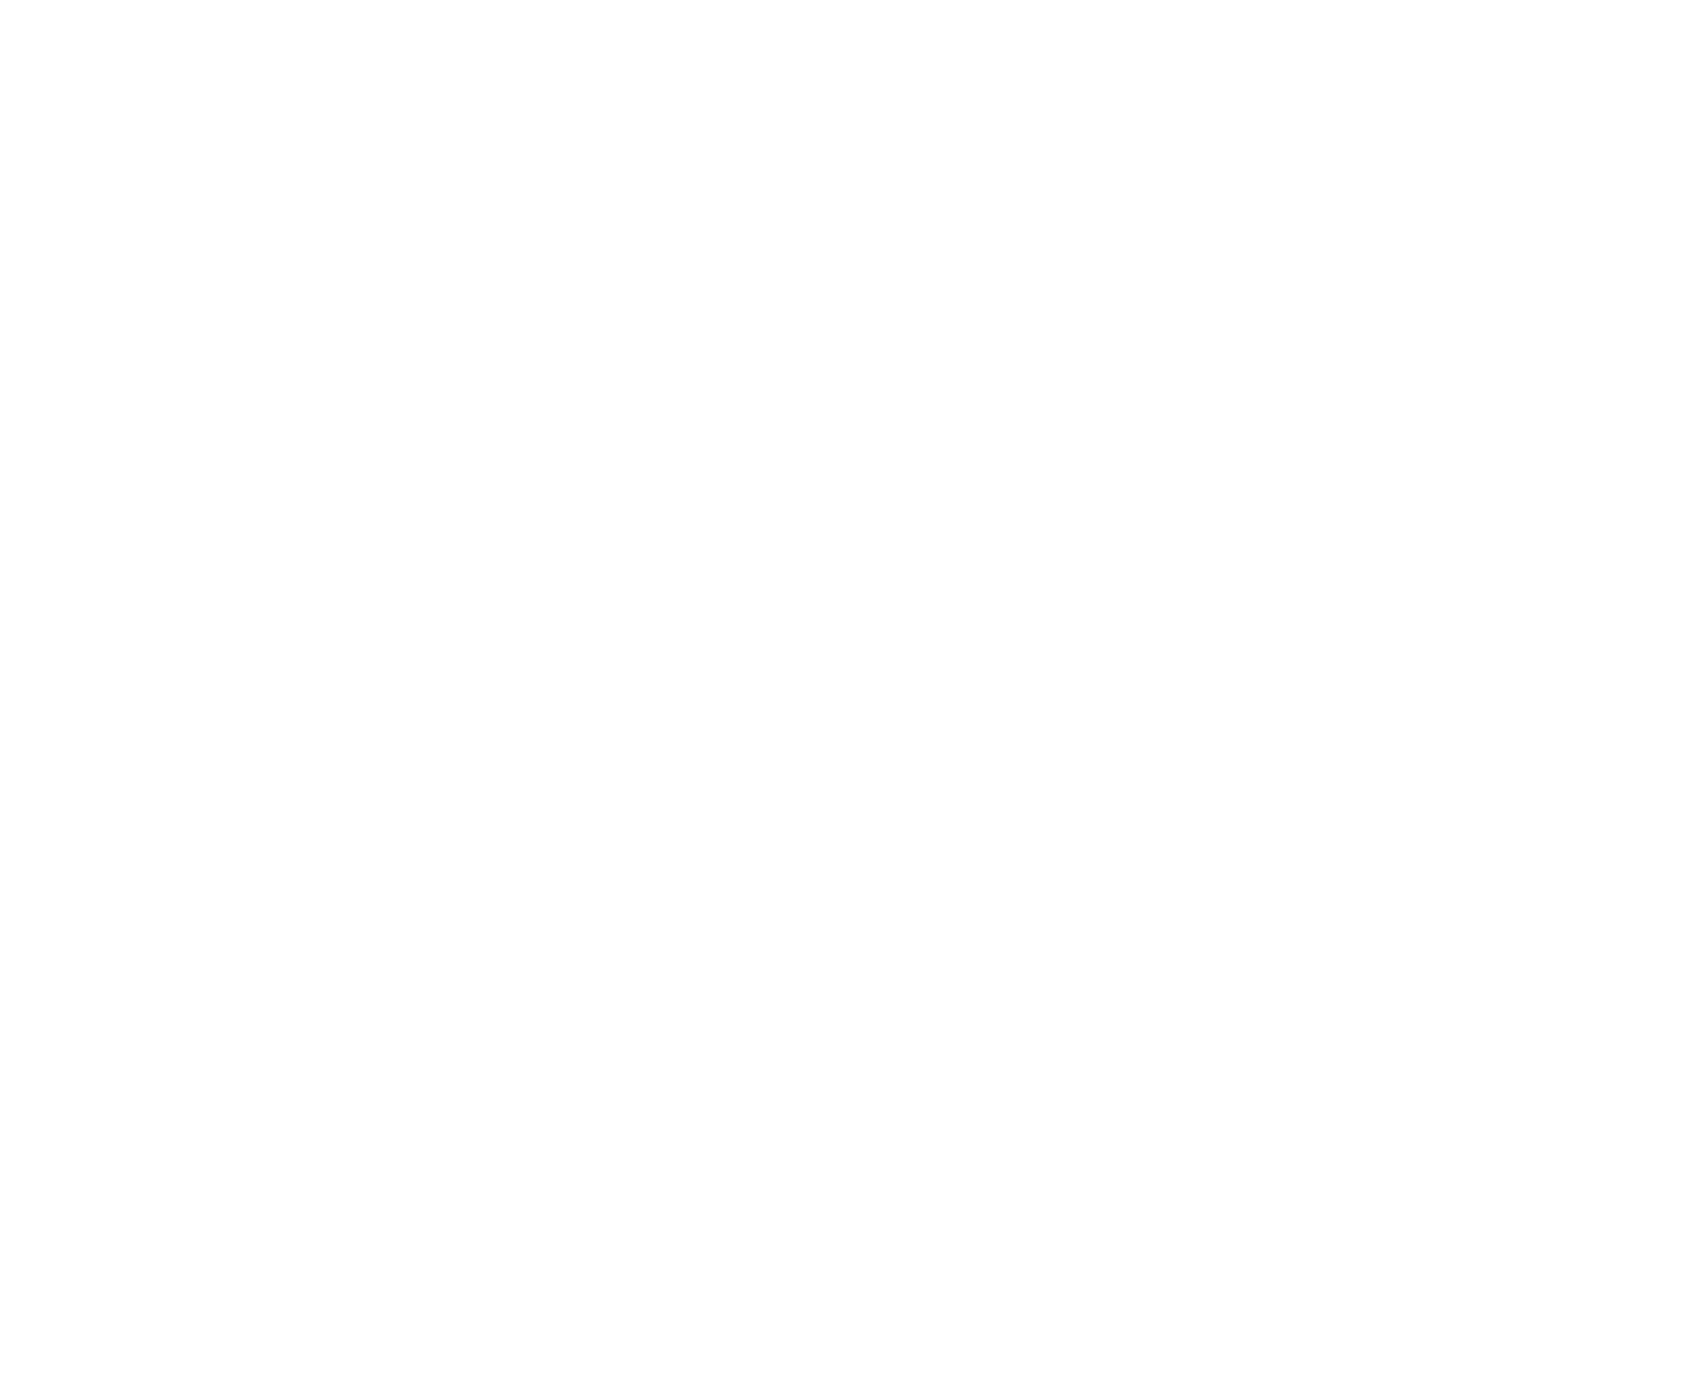

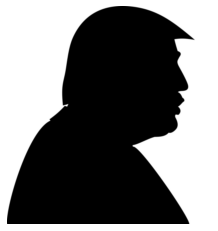

In [5]:
np.array(sorted_dict[-50:][::-1])[:,1]
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    
trump_mask = np.array(Image.open(path.join(d, "dt_3.jpg")))
wc = WordCloud(background_color="white", max_words=50, mask=trump_mask,stopwords='', contour_width=3, contour_color='steelblue').generate(top_words)
wc.to_file(path.join(d, "Trump_positive.jpeg"))

    
    
plt.figure(figsize=(30,25))
plt.axis("off")
plt.figure()
plt.imshow(trump_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
import json
from emoji import UNICODE_EMOJI
      
def split(word): 
    return list(word) 


def check_emoji(text):
    all_emoji = []

    for ele in text:
        if ele in UNICODE_EMOJI:
            if ele not in (all_emoji):
                all_emoji.append(ele)        
    emojis = ''.join(all_emoji)
    
    
        
    return emojis
            


with open('../emoji/emoji_final_join.json',encoding='utf-8') as f: 
    emoji_list = json.load(f)

total_emoji = []
for i, element in enumerate(data):
    if sentiment[i] == 2:
        emojis = check_emoji(element)
        if emojis != '':
            emojis = split(emojis)
            for e in emojis:
                if e == '🏻' or e == '🏽'or e== '🏾' or e == '🏿' or e == '🏼':
                    break     
                total_emoji.append(e)

counts = {}
for i in total_emoji:
    counts[i] = counts.get(i, 0) + 1
sorted_dict = sorted(counts.items(), key=lambda x: x[1])
top_words = np.array(sorted_dict[-50:][::-1])[:,0]
print(top_words)
print(np.array(sorted_dict[-50:][::-1])[:,1])

['🇺' '🇸' '😂' '🤣' '🙏' '👏' '👍' '👇' '😆' '😁' '😎' '😀' '🌊' '😉' '🤔' '🙄' '🇷' '🤦'
 '🤮' '💯' '💕' '😳' '💙' '🤷' '🇱' '😕' '😏' '👈' '😡' '😺' '👊' '😄' '🌎' '🇮' '💥' '💖'
 '✊' '💪' '🙌' '😱' '👑' '🌍' '🐈' '🚂' '🎥' '🇹' '👉' '😃' '🇪' '🇨']
['86' '83' '72' '27' '21' '17' '12' '10' '8' '7' '7' '7' '7' '7' '7' '7'
 '7' '6' '5' '5' '5' '5' '5' '5' '4' '4' '4' '4' '4' '4' '3' '3' '3' '3'
 '3' '3' '3' '3' '3' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2']


In [7]:
words =[]
for i, tweet in enumerate(data):
    if sentiment[i] == 0:
        a = process_document(tweet)
        words += a
counts = {}
for i in words:
    counts[i] = counts.get(i, 0) + 1
sorted_dict = sorted(counts.items(), key=lambda x: x[1])
top_words = np.array(sorted_dict[-60:][::-1])[:,0]
    
    
top_words = ' '.join(top_words)
top_words

'impeach say peopl hate get like go take us would know corrupt one republican elect hous think make america onli white democrat law want day call break time lie american countri fuck support crimin pelosi state never nanci come news polit need wrong ukrain see work lose tri bad thing year noth vote world man hospit tweet biden even militari'

In [8]:
top_words = 'impeachment say people hate go know corrupt republican election house think make america only white democrat law day call break time lie american country fuck support criminal Pelosi state never come news polit need wrong lose bad thing year'



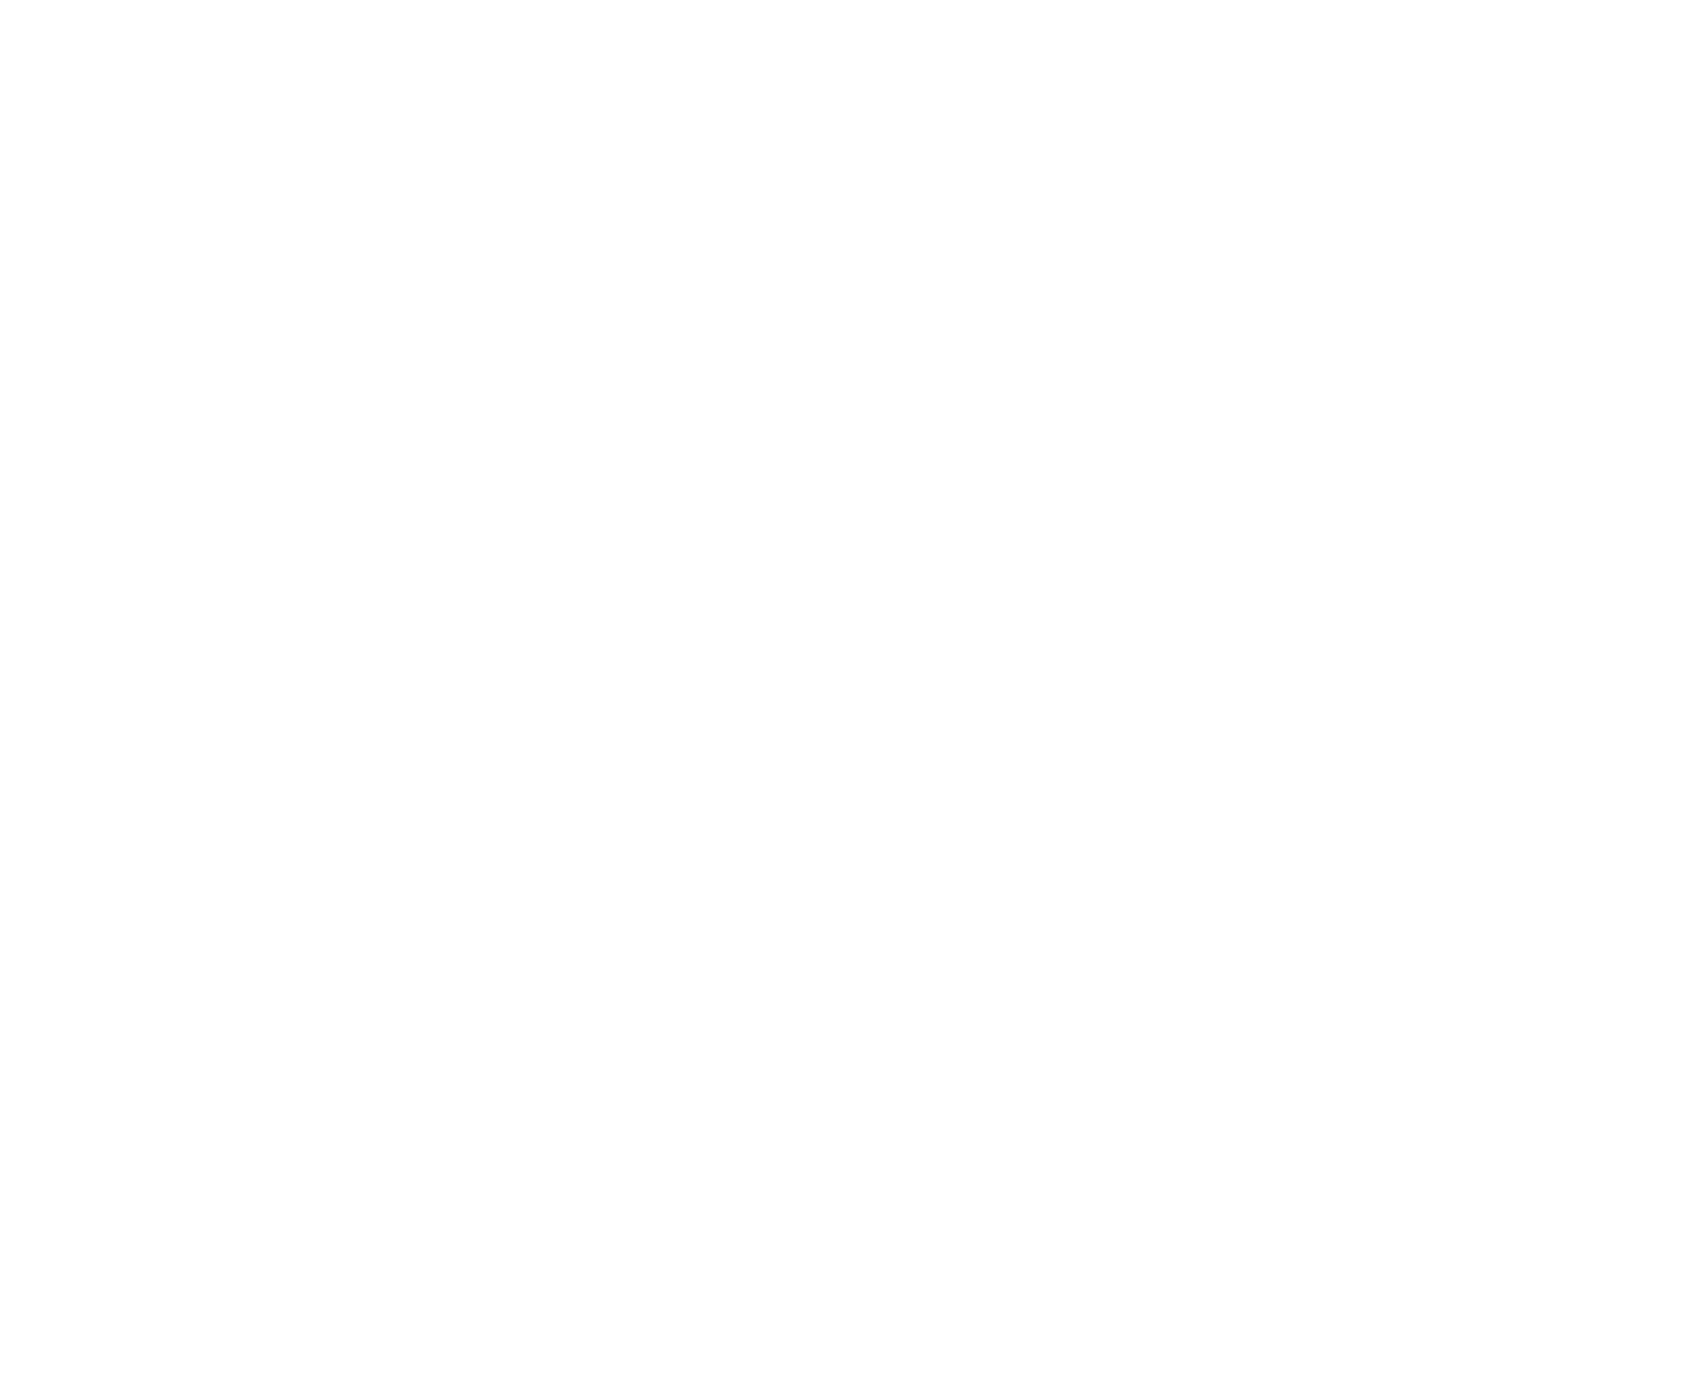

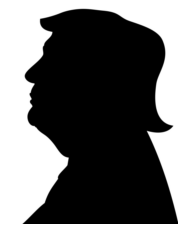

In [9]:
np.array(sorted_dict[-50:][::-1])[:,1]
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    
trump_mask = np.array(Image.open(path.join(d, "dt_2.jpg")))
wc = WordCloud(background_color="Black", max_words=2000, mask=trump_mask,stopwords='', contour_width=3, contour_color='steelblue').generate(top_words)
wc.to_file(path.join(d, "Trump_negative.jpeg"))

    
    
plt.figure(figsize=(30,25))
plt.axis("off")
plt.figure()
plt.imshow(trump_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
total_emoji = []
for i, element in enumerate(data):
    if sentiment[i] == 0:
        emojis = check_emoji(element)
        if emojis != '':
            emojis = split(emojis)
            for e in emojis:
                if e == '🏻' or e == '🏽'or e== '🏾' or e == '🏿' or e == '🏼':
                    break        
                total_emoji.append(e)

counts = {}
for i in total_emoji:
    counts[i] = counts.get(i, 0) + 1
sorted_dict = sorted(counts.items(), key=lambda x: x[1])
top_words = np.array(sorted_dict[-50:][::-1])[:,0]
print(top_words)
print(np.array(sorted_dict[-50:][::-1])[:,1])

['🇺' '🇸' '😂' '🤔' '🤣' '🙏' '🙄' '😭' '👉' '😡' '😳' '👍' '🤷' '💩' '👎' '😜' '😩' '🤦'
 '😠' '👏' '👇' '😢' '🤡' '💀' '♀' '🤮' '🌊' '🤬' '😤' '💂' '😬' '🔥' '😮' '❗' '💪' '🤥'
 '😌' '😔' '✅' '💔' '🖕' '😊' '💙' '💯' '🦅' '🧐' '😧' '♂' '😥' '🤢']
['31' '28' '21' '19' '12' '10' '9' '8' '7' '7' '7' '6' '6' '6' '5' '5' '5'
 '5' '4' '4' '4' '4' '4' '3' '3' '3' '3' '3' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2']


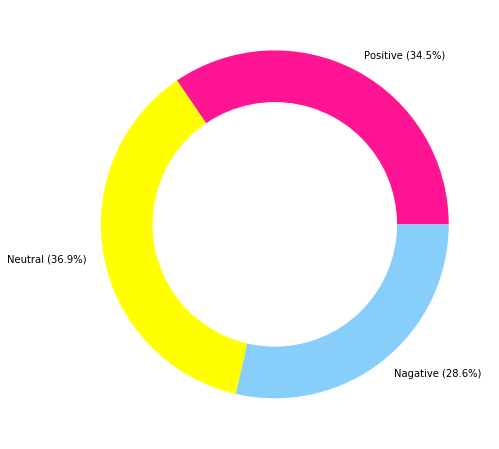

In [31]:
size = [34.5, 36.9, 28.6]
names  = ['Positive (34.5%)', 'Neutral (36.9%)', 'Nagative (28.6%)']
color = ['deeppink','yellow','lightskyblue']
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=color)
p=plt.gcf()
p.set_size_inches(11,8)
p.gca().add_artist(my_circle)
plt.show()
 


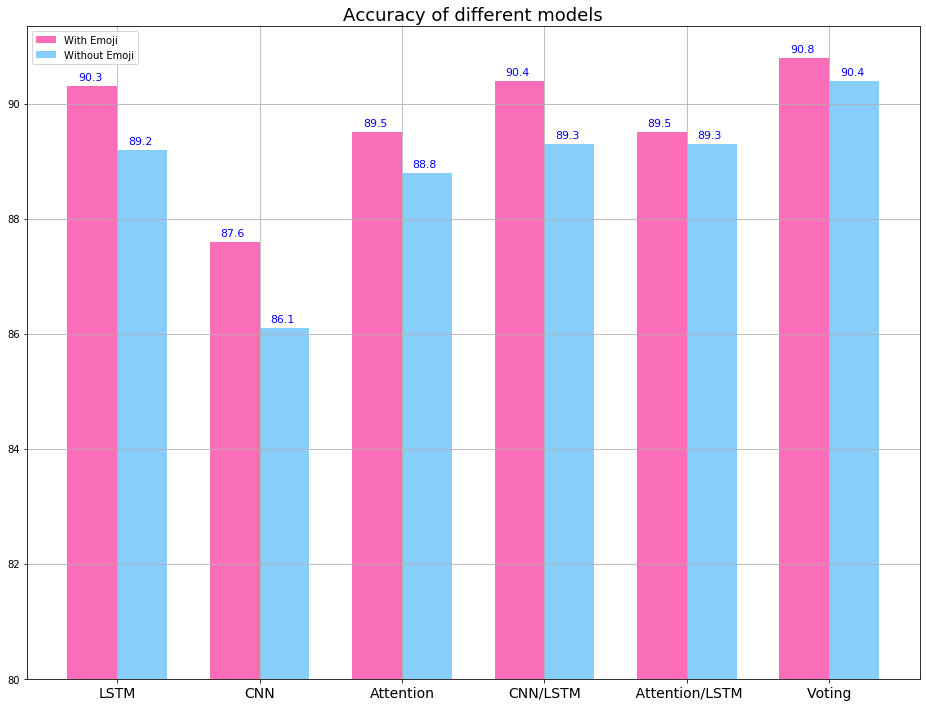

In [21]:
import numpy as np
import matplotlib.pyplot as plt


N = 6
g1 = (10.3, 7.6, 9.5, 10.4, 9.5,10.8)

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, g1, width, bottom=80,color='#FA6EB9')


g2 = (9.2, 6.1, 8.8, 9.3, 9.3, 10.4)
p2 = ax.bar(ind + width, g2, width, bottom=80,color='lightskyblue')

ax.set_title('Accuracy of different models',fontsize=18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('LSTM', 'CNN', 'Attention', 'CNN/LSTM', ' Attention/LSTM','Voting'),fontsize=14)

ax.legend((p1[0], p2[0]), ('With Emoji', 'Without Emoji'))
# for i, v in enumerate(g1):
#     ax.text(i,v, str(v+80), color='blue',va= 'bottom', fontweight='bold')
for i, v in enumerate(g1):
    plt.text(i-0.1, v + 80.1, str(80+v),color='blue',fontsize=11)

for i, v in enumerate(g2):
    plt.text(i+0.25, v + 80.1, str(80+v),color='blue',fontsize=11)

    

ax.autoscale_view()
plt.grid()

p=plt.gcf()
p.set_size_inches(16,12)
plt.show()